### Logan Kronforst

### Exploring Newton's Method

### 2. Demonstrate Newton's Method by using it to find the positive root of the function $f(x) = x^{2} - 12$

(a) What is the true value of the root? 

The true value of the root is $3.4641$

(b) What must be avoided in the selection of a starting value? Explain

If $f$ has a root close to zero, do not select a value for $x_{0}$ that will cause the denominator $f'(x_{n})$ to be zero. Moreover selecting a root of $x_{0} = 1$ will cause $x_{n}$ to get stuck in a back and forth cycle that does not converge in rare cases(Textbook pg.$318$). 




This is a handcoded, original newton raphson method implemented in python 3.10.9 by Logan Kronforst

In [38]:

def newton_raphson(f, f_prime, x_n, n):
    for i in range(n):
        x_n1 = x_n - (f(x_n) / f_prime(x_n))
        print(f'The estimate for iteration {i} is {round(x_n1,14)}')
        x_n = x_n1

These fucntions define the initial functions for $f(x)$ and $f'(x)$ for problem 2. 

In [39]:
def f (x):
    return x * x - 12

def f_prime (x):
    return 2 * x

This is $10$ iterations of my custom newton's method for problem $2$

In [40]:
newton_raphson(f, f_prime, 1.0, 10)

The estimate for iteration 0 is 6.5
The estimate for iteration 1 is 4.17307692307692
The estimate for iteration 2 is 3.52432647997164
The estimate for iteration 3 is 3.46461618641327
The estimate for iteration 4 is 3.4641016533503
The estimate for iteration 5 is 3.46410161513775
The estimate for iteration 6 is 3.46410161513775
The estimate for iteration 7 is 3.46410161513775
The estimate for iteration 8 is 3.46410161513775
The estimate for iteration 9 is 3.46410161513775


(c)
The estimate is $3.46410161513775$ and it took 5 iterations to obtain it. 

### 3. An Interesting Example

(a) The real root of the function is zero

In [41]:
def f (x):
    return (8*x**2) / (3*x**2 + 1)

def f_prime (x):
    return (16*x) / ((3*x**2+1)**2)
    

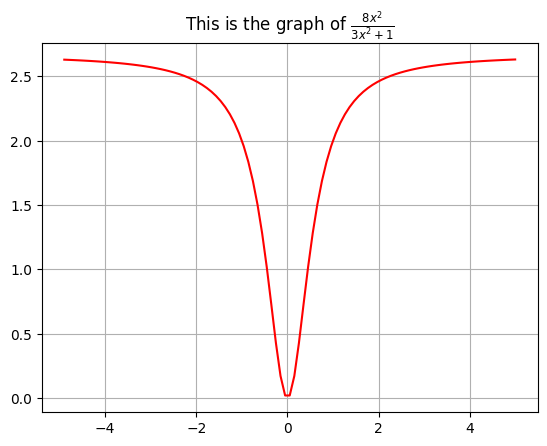

In [42]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)[1:]

plt.plot (x, f(x), color = 'r')
plt.grid()
plt.title(r'This is the graph of $\frac{8x^{2}}{3x^{2}+1}$')
plt.show()

(b)
The method breaks down after about 5 iterations with a starting value of $2$, the result becomes to large and python outputs an 'overflow error'.

In [43]:
newton_raphson(f, f_prime, 2, 5)

The estimate for iteration 0 is -11.0
The estimate for iteration 1 is 1991.0000000000011
The estimate for iteration 2 is -11838726911.00002
The estimate for iteration 3 is 2.488893232996843e+30
The estimate for iteration 4 is -2.3126507925909688e+91


(c) A starting value of $1$ iterates back and both between $-1$ and $1$, creating an infinite loop that never converges. 

In [44]:
newton_raphson(f, f_prime, 1, 20)

The estimate for iteration 0 is -1.0
The estimate for iteration 1 is 1.0
The estimate for iteration 2 is -1.0
The estimate for iteration 3 is 1.0
The estimate for iteration 4 is -1.0
The estimate for iteration 5 is 1.0
The estimate for iteration 6 is -1.0
The estimate for iteration 7 is 1.0
The estimate for iteration 8 is -1.0
The estimate for iteration 9 is 1.0
The estimate for iteration 10 is -1.0
The estimate for iteration 11 is 1.0
The estimate for iteration 12 is -1.0
The estimate for iteration 13 is 1.0
The estimate for iteration 14 is -1.0
The estimate for iteration 15 is 1.0
The estimate for iteration 16 is -1.0
The estimate for iteration 17 is 1.0
The estimate for iteration 18 is -1.0
The estimate for iteration 19 is 1.0


(d) The method starts to converge, but very slowly

In [45]:
newton_raphson(f, f_prime, .5, 20)

The estimate for iteration 0 is 0.0625
The estimate for iteration 1 is 0.0308837890625
The estimate for iteration 2 is 0.01539770870386
The estimate for iteration 3 is 0.00769337840088
The estimate for iteration 4 is 0.0038460061661
The estimate for iteration 5 is 0.00192291774923
The estimate for iteration 6 is 0.00096144820931
The estimate for iteration 7 is 0.00048072277153
The estimate for iteration 8 is 0.00024036121913
The estimate for iteration 9 is 0.00012018058873
The estimate for iteration 10 is 6.009029176e-05
The estimate for iteration 11 is 3.004514556e-05
The estimate for iteration 12 is 1.502257274e-05
The estimate for iteration 13 is 7.51128636e-06
The estimate for iteration 14 is 3.75564318e-06
The estimate for iteration 15 is 1.87782159e-06
The estimate for iteration 16 is 9.389108e-07
The estimate for iteration 17 is 4.694554e-07
The estimate for iteration 18 is 2.347277e-07
The estimate for iteration 19 is 1.1736385e-07


(e) This example suggests that selecting an appropriate value for $x_{n}$ is very important for the efficieny of the algorithm to converge. When you have a real root that is close to or equal to zero, it's best to choose a starting value that is as close to zero as possible, or you risk the method failing. 

### 4. Rate of Convergence

The rate of convergence for $x_{n} = 1$ for $f(x) = x^{2} - 12$ is $0.5$

In [46]:
def f (x):
    return x * x - 12

def f_prime (x):
    return 2 * x

Custom function programmed by Logan Kronforst to estimate the rate of convergence of newton's method

In [50]:
def convergence(f, f_prime, x_n, n, r):
    for i in range(n):
        x_n1 = x_n - (f(x_n) / f_prime(x_n))
        C = abs(x_n1 - r) / abs(x_n - r)**2
    return C    
        

In [52]:
convergence(f, f_prime, 1.0, 1000000,3.46410161513775 )

0.5000000000000027

### 5. Applying Newton's Method

(a) To find and classify critial points using newton's method we can use the original method to find the a critical point where $f(x) = 0$ and an modified version of newtons method that is similar, $x_{n+1} = x_{n} - \frac{f'(x_{n})}{f''(x_{n})}$ where $f'(x) = 0$

(b) To classify the critical point where $f(x) = 0$ and $f'(x) = 0$ we can substitute the critical point in for $f''(x)$, if $f''(x) < 0$, $f(x)$ has a local max at $x$, and if $f''(x) > 0$, $f(x)$ has a local min at $x$

(c) $f(x)$ has a local at max at $x\approx 0.44$, and an inflection point at $x = 1$


Definition of $f(x), f'(x), f''(x)$

In [55]:
def f (x):
    return (x**5) - (11*x**4) + (29*x**3) - (31*x**2) + (14*x) - (2)

def f_prime (x):
    return (5*x**4) - (44*x**3) + (87*x**2) - (62*x) + (14)

def f_double_prime (x):
    return (20*x**3) - (132*x**2) + (174*x) - (62)

As you can see in the plot, there is clearly a local extrema at around $x = 0.4$ and an inflection point at $x=1$

<function matplotlib.pyplot.show(close=None, block=None)>

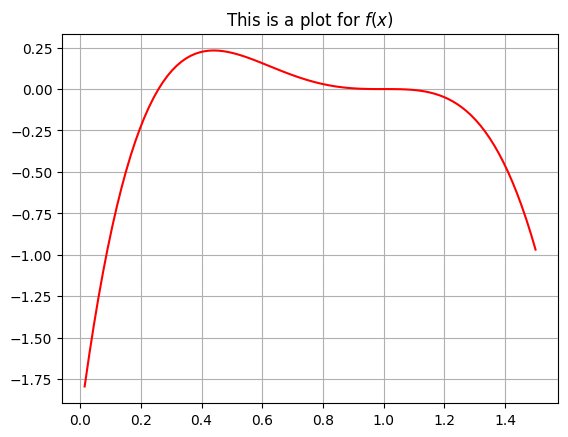

In [56]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1.5, 100)[1:]

plt.plot (x, f(x), color = 'r')
plt.title ('This is a plot for $f(x)$')
plt.grid()
plt.show

Estimation of critical point where $f(x) = 0$

In [ ]:
newton_raphson(f, f_prime, 2, 20)

The estimate for iteration 0 is 1.70588235294118
The estimate for iteration 1 is 1.49646478259968
The estimate for iteration 2 is 1.34699412395135
The estimate for iteration 3 is 1.24070010134697
The estimate for iteration 4 is 1.16566884129984
The estimate for iteration 5 is 1.11319877415526
The estimate for iteration 6 is 1.07686285427499
The estimate for iteration 7 is 1.05192658611267
The estimate for iteration 8 is 1.0349441873333
The estimate for iteration 9 is 1.02344857947644
The estimate for iteration 10 is 1.01570250683984
The estimate for iteration 11 is 1.01050024269088
The estimate for iteration 12 is 1.00701456949225
The estimate for iteration 13 is 1.00468285234002
The estimate for iteration 14 is 1.00312479922009
The estimate for iteration 15 is 1.00208449357477
The estimate for iteration 16 is 1.00139023934816
The estimate for iteration 17 is 1.00092708323557
The estimate for iteration 18 is 1.00061816944149
The estimate for iteration 19 is 1.00041216368153


Estimation of critical point where $f'(x) = 0$ using a modified newton raphsons method,  $x_{n+1} = x_{n} - \frac{f'(x_{n})}{f''(x_{n})}$

In [ ]:
newton_raphson(f_prime, f_double_prime, .2, 20)

The estimate for iteration 0 is 0.34653465346535
The estimate for iteration 1 is 0.41850190489433
The estimate for iteration 2 is 0.43868520825952
The estimate for iteration 3 is 0.44026096136616
The estimate for iteration 4 is 0.44027028228513
The estimate for iteration 5 is 0.44027028261025
The estimate for iteration 6 is 0.44027028261025
The estimate for iteration 7 is 0.44027028261025
The estimate for iteration 8 is 0.44027028261025
The estimate for iteration 9 is 0.44027028261025
The estimate for iteration 10 is 0.44027028261025
The estimate for iteration 11 is 0.44027028261025
The estimate for iteration 12 is 0.44027028261025
The estimate for iteration 13 is 0.44027028261025
The estimate for iteration 14 is 0.44027028261025
The estimate for iteration 15 is 0.44027028261025
The estimate for iteration 16 is 0.44027028261025
The estimate for iteration 17 is 0.44027028261025
The estimate for iteration 18 is 0.44027028261025
The estimate for iteration 19 is 0.44027028261025


### 6. A Modification of Newton's Method

A modified newton raphsons method where $f'(x_{0})$ is only calculated once. 

In [ ]:
def newton_raphson_mod(f, f_prime, x_n, x_0, n):
    for i in range(n):
        x_n1 = x_n - (f(x_n) / f_prime(x_0))
        print(f'The estimate for iteration {i} is {round(x_n1,14)}')
        x_n = x_n1

In [ ]:
def f (x):
    return (8*x**2) / (3*x**2 + 1)

def f_prime (x):
    return (16*x) / ((3*x**2+1)**2)

(a)

Modified newton's method for the function $\frac{8x^{2}}{3x^{2}+1}$

In [ ]:
newton_raphson_mod(f, f_prime, .5, .5, 20)

The estimate for iteration 0 is 0.0625
The estimate for iteration 1 is 0.05067567567568
The estimate for iteration 2 is 0.04287122788371
The estimate for iteration 3 is 0.03727339543381
The estimate for iteration 4 is 0.03303630562982
The estimate for iteration 5 is 0.02970480877961
The estimate for iteration 6 is 0.02700966768741
The estimate for iteration 7 is 0.02478038504057
The estimate for iteration 8 is 0.02290326141636
The estimate for iteration 9 is 0.02129932238817
The estimate for iteration 10 is 0.01991187345966
The estimate for iteration 11 is 0.01869908772231
The estimate for iteration 12 is 0.01762938866447
The estimate for iteration 13 is 0.01667846454974
The estimate for iteration 14 is 0.01582727564046
The estimate for iteration 15 is 0.01506068735918
The estimate for iteration 16 is 0.01436651029769
The estimate for iteration 17 is 0.01373481179596
The estimate for iteration 18 is 0.01315741308504
The estimate for iteration 19 is 0.01262751588629


In [ ]:
def f (x):
    return x * x - 12

def f_prime (x):
    return 2 * x

Modified newton's method for the function $f(x) = x^{2} - 12$

In [ ]:
newton_raphson_mod(f, f_prime, 1, 1, 20)

The estimate for iteration 0 is 6.5
The estimate for iteration 1 is -8.625
The estimate for iteration 2 is -39.8203125
The estimate for iteration 3 is -826.6489562988281
The estimate for iteration 4 is -342494.89743126975
The estimate for iteration 5 is -58651719872.12543
The estimate for iteration 6 is -1.720012122037788e+21
The estimate for iteration 7 is -1.4792208499784675e+42
The estimate for iteration 8 is -1.09404716150551e+84
The estimate for iteration 9 is -5.984695957991316e+167
The estimate for iteration 10 is -inf
The estimate for iteration 11 is -inf
The estimate for iteration 12 is -inf
The estimate for iteration 13 is -inf
The estimate for iteration 14 is -inf
The estimate for iteration 15 is -inf
The estimate for iteration 16 is -inf
The estimate for iteration 17 is -inf
The estimate for iteration 18 is -inf
The estimate for iteration 19 is -inf


(b) Using the same initial value for to find the real roots of $f(x) = x^{2} - 12$ for the modified newtons method yeilds different results, as the method converges to infinity, choosing a number closer to the actual root produces a more accurate convergence. Similarly using the modified newton's method for $\frac{8x^{2}}{3x^{2}+1}$ actually begins to converge to the real root when using an initial value of $0.5$. 

(c) The advantage of this approach is you can avoid the some of the break down in the method when trying to approximate a function like $\frac{8x^{2}}{3x^{2}+1}$. An advantage is when approximating a non-rare function, your initial guess for $x_{n}$ has to be more precise. 